Here we are going to look at how the proportion of Hobbyists has changed over time. There is a complexity here which is that the survey questions have changed every year and so are not directly comparable, and as a result the following assumptions have been made:
- In years where Hobby and Open Source were separate questions, we have grouped these responses into 1 new column. This is because it is assumed that in the years where only the Hobby question was present, people who do Open Source would have put themselves into that category.
- 2019 had the option of 'Less than once per year' for Open Source. As this is such a small frequency to be doing Open Source, I have categorised that as a 'No' response.

First we import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

For all the datasets below we:
- Import the data
- Remove the null values
- Map the Hobbyist response to a numerical column
- Add the year for each dataset
- Drop the redundant columns

In [2]:
df_2020 = pd.read_csv('./survey_results/2020/survey_results_public.csv', usecols=['Hobbyist'])
df_2020.dropna(inplace=True)
df_2020['HobbyistNum'] = df_2020['Hobbyist'].replace(to_replace={'Yes': 1, 'No': 0})
df_2020['Year'] = 2020
df_2020.drop(columns=['Hobbyist'], inplace=True)

In [3]:
df_2019 = pd.read_csv('./survey_results/2019/survey_results_public.csv', usecols=['Hobbyist','OpenSourcer'])
df_2019.dropna(subset=['Hobbyist', 'OpenSourcer'], inplace=True)
df_2019['HobbyistNum'] = df_2019[['Hobbyist','OpenSourcer']].apply(lambda x: 0 if x[0] == 'No' and ((x[1] == 'Never') or (x[1] == 'Less than once per year')) else 1, axis=1)
df_2019['Year'] = 2019
df_2019.drop(columns=['Hobbyist','OpenSourcer'], inplace=True)

In [4]:
df_2018 = pd.read_csv('./survey_results/2018/survey_results_public.csv', usecols=['Hobby','OpenSource'])
df_2018.dropna(subset=['Hobby','OpenSource'], inplace=True)
df_2018['HobbyistNum'] = df_2018[['Hobby','OpenSource']].apply(lambda x: 0 if x[0] == 'No' and x[1] == 'No' else 1, axis=1)
df_2018['Year'] = 2018
df_2018.drop(columns=['Hobby', 'OpenSource'], inplace=True)

In [5]:
df_2017 = pd.read_csv('./survey_results/2017/survey_results_public.csv', usecols=['ProgramHobby'])
df_2017.dropna(inplace=True)
df_2017['HobbyistNum'] = df_2017['ProgramHobby'].apply(lambda x: 0 if x == 'No' else 1)
df_2017['Year'] = 2017
df_2017.drop(columns=['ProgramHobby'], inplace=True)

In [6]:
df_2016 = pd.read_csv('./survey_results/2016/survey_results_public.csv', usecols=['hobby'])
df_2016.dropna(inplace=True)
df_2016.drop(index=df_2016[df_2016['hobby'] == 'Other (please specify)'].index, inplace=True)
df_2016['HobbyistNum'] = df_2016['hobby'].apply(lambda x: 0 if x == 'None' else 1)
df_2016['Year'] = 2016
df_2016.drop(columns=['hobby'], inplace=True)

In [7]:
df_2015 = pd.read_csv('./survey_results/2015/survey_results_public.csv', usecols=['How many hours programming as hobby per week?'])
df_2015.dropna(inplace=True)
df_2015.rename(columns={'How many hours programming as hobby per week?': 'Hobby'}, inplace=True)
df_2015['HobbyistNum'] = df_2015['Hobby'].apply(lambda x: 0 if x == 'None' else 1)
df_2015['Year'] = 2015
df_2015.drop(columns=['Hobby'], inplace=True)

Now that all of our dataframes for each year share the Year and numerical Hobbyist column, we can concatenate them into one dataframe. Then we can plot the mean for each year to look for any trends

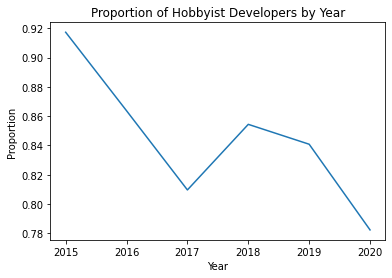

In [8]:
df = pd.concat(objs=[df_2015, df_2016, df_2017, df_2018, df_2019, df_2020])
df.groupby('Year').mean().plot(legend=False, title='Proportion of Hobbyist Developers by Year', ylabel='Proportion');

Here we can see that contrary to my prior expectation, the proportion of Hobbyist developers actually appears to be going down over time rather than u